<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Lab Assignment 4 </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Name: Gavin Mason </h2>

### Labor markets and returns to schooling
For this problem you will use the dataset supplied via Canvas, filename: “Card_Returns.dta”, which is taken from Card, David (1995) “Using Geographic Variation in College Proximity to Estimate the Returns to Schooling," in Aspects of Labour Market Behavior: Essays in Honour of John Vanderkamp, ed. L. H. Christophides, E. K. Grand, and R. Swidinsky. Toronto: University of Toronto Press: 201-222. The data measure a variety of characteristics of individuals and include data on the proximity of two- and four-year colleges.

Familiarize yourself with the data based on the accompanying PDF of Card’s working paper. Note where the data are originally from, what kind of sampling was involved, and the units of observation.

Pay particular attention to the following variables and ensure you know what they measure and in what units: wage, educ, exper, exper2. You may have to infer the units of measurement from the variable distributions. 

For your writeup, present a table that shows sample means, standard deviations, and minimum/maximum values for the wage, educ, exper variables (call this Table 1). In a note to this table, say how many observations are in the dataset and how many variables there are. Also present a scatter plot of wage by education in a way you think makes sense. Call this Figure 5.

Run the following regressions:

Specification 1: $ln⁡(wage)=\beta_0+\beta_1 (educ)+u_i$ 

Specification 2: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+u_i$

Specification 3: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+\beta_3 (expersq)+u_i$

Specification 4: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+u_i$

Specification 5: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+\beta_5(black)+u_i$ 

* For the married variable show two different ways of creating a dummy variable to incorporate in your regression. 

* Present a regression output table (Table 2). Below the set of tables, provide discussion of the parameter estimates for Specification 5 (interpret the fitted values for $\beta_0$,$\beta_1$,$\beta_2$,$\beta_3$,$\beta_4$,$\beta_5$). Comment on any major changes you see between Specification 5 and Specification 2.

* When a worker gains one more year of experience, by how much is the wage expected to increase, on average? Discuss differences in the parameter estimates in specifications 2 and 3. (Hint: Take the derivative of each with respect to experience.)

* State the first two algebraic properties of the OLS estimator. Verify that these properties hold in Specification 1 and Specification 5. *(Hint: You will be able to do this by predicting the residuals into the data, and then using the “sum” function on the variables.)*



In [67]:
import os
import wooldridge as woo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from scipy.optimize import minimize

In [68]:
card = pd.read_stata("/Users/gavinmason/Desktop/card.dta")

In [69]:
#Table 1
#Dataset: 3010 observations of 34 variables
tablestats = card[["wage", "educ", "exper"]]
tablestats.describe()

,wage,educ,exper
count,3010.000000,3010.000000,3010.000000
mean,577.282392,13.263455,8.856146
std,262.958302,2.676913,4.141672
min,100.000000,1.000000,0.000000
25%,394.250000,12.000000,6.000000
50%,537.500000,13.000000,8.000000
75%,708.750000,16.000000,11.000000
max,2404.000000,18.000000,23.000000


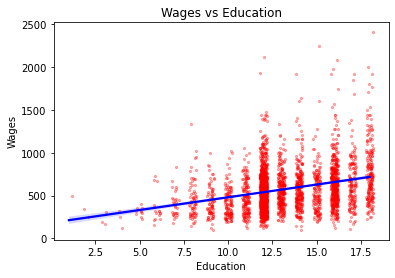

In [70]:
#Figure 5
sns.regplot(x= "educ", y= "wage", data=card,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(title= 'Wages vs Education',
                                                  xlabel="Education", ylabel = "Wages");

In [71]:
reg1 = smf.ols(formula='np.log(wage) ~ educ', data=card).fit()
reg2 = smf.ols(formula='np.log(wage) ~ educ + exper', data=card).fit()
reg3 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq', data=card).fit()
reg4 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq + married', data=card).fit()
reg5 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq + married + black', data=card).fit()

In [72]:
m1 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq + C(married)', data=card)

In [73]:
card['ismarried'] = (card['married'] >= 1)

card['ismarried'].value_counts()

True     3003
False       7
Name: ismarried, dtype: int64

In [74]:
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5])
HTML(stargazer.render_html())

In [75]:
table = pd.DataFrame({'Betasm1': round(reg1.params, 4),
                      'Betasm2': round(reg2.params, 4),
                      'Betasm3': round(reg3.params, 4),
                      'Betasm4': round(reg4.params, 4),
                      'Betasm5': round(reg5.params, 4)})
table

,Betasm1,Betasm2,Betasm3,Betasm4,Betasm5
Intercept,5.5709,4.6660,4.4685,4.6672,4.8379
black,NaN,NaN,NaN,NaN,-0.2147
educ,0.0521,0.0932,0.0932,0.0898,0.0799
exper,NaN,0.0407,0.0898,0.0775,0.0780
expersq,NaN,NaN,-0.0025,-0.0021,-0.0022
married,NaN,NaN,NaN,-0.0351,-0.0296


In [76]:
#A 1 year change in experience will see an average increase in wage of 4.06%
reg2.params[2]

0.04065736313964427

In [77]:
#A 1 year change in experience will see an average increase in wage of 8.48%
#Increase of 4.42% between Model 2 and Model 3 is explained by experience's quadratic relationship with wage
#When accounting for the quadratic, we see that it is not an entirely linear relationship as shown in Model 2
reg3.params[2] + 2*reg3.params[3]

0.08481092582338778

In [78]:
#A 1 year change in experience will see an average increase in wage of 7.32%
reg4.params[2] + 2*reg4.params[3] 

0.07324729932653706

In [79]:
#A 1 year change in experience will see an average increase in wage of 7.36%
reg5.params[2] + 2*reg5.params[3]

0.07359582874098544

In [80]:
#The first algebraic property says the predicted sum of the residuals should be equal to 0.
#Second algebraic property says the covariance between u-hat and x variables should equal 0.

In [81]:
#Specification 1 - Algebraic Rules 1 & 2
yhat1 = card["educ"]*reg1.params[1]+reg1.params[0]
res1 = np.log(card['wage'])-yhat1
np.sum(res1)

1.2647660696529783e-12

In [82]:
np.sum(res1*card["educ"])

1.8189894035458565e-11

In [83]:
#Specification 5 - Algebraic Rules 1 & 2

In [84]:
yhat5=reg5.params[0]+card['educ']*reg5.params[1]+card['exper']*reg5.params[2]+card['expersq']*reg5.params[3]+card['married']*reg5.params[4]+card['black']*reg5.params[5]
res5=np.log(card['wage'])-yhat5
np.sum(res5)

9.466845085626119e-10

In [85]:
print(np.sum(res5*card['educ']))
print(np.sum(res5*card['exper']))
print(np.sum(res5*card['expersq']))
print(np.sum(res5*card['married']))
print(np.sum(res5*card['black']))

1.1094243745901622e-08
1.1823885870398954e-08
1.631542545510456e-07
1.821206296881428e-09
2.6971136435349763e-10
